Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Classification:https://archive.ics.uci.edu/ml/datasets/Census+Income
Data ingestion

- EDA
- Preprocessing
- Pickling for the preprocessing object(save the preprocessing model)
- After preprocessing you have to store data inside MONGODB  

You have to load the data from mongo db
Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)

Evaluation of the model Regression evaluation matrix: R2 and adjusted R2 Classification confusion matrix, ROC AUC score

Submission form link: https://forms.gle/2PJSSCmL9S865nwe8


### We will do the regression model in this workbook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df = pd.read_csv("/media/vyoom/HDD/downloads/dataset/household_power_consumption.txt", sep = ";")

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Taking a random sample of data

In [5]:
df = df.sample(n = 15000, random_state = 3)

In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1234544,22/4/2009,01:08:00,0.346,0.084,241.380,1.400,0.000,2.000,0.0
2014090,15/10/2010,09:34:00,1.324,0.080,240.030,5.400,0.000,0.000,18.0
1236957,23/4/2009,17:21:00,1.468,0.116,241.390,6.000,0.000,2.000,19.0
1988947,27/9/2010,22:31:00,?,?,?,?,?,?,NaN
602895,8/2/2008,09:39:00,1.968,0.000,236.210,8.400,0.000,0.000,18.0


There are some of non numeric values in the data. Lets handle those.

### Handling '?' in the data:

In [8]:
df = df[df['Global_active_power'] != "?"]

# checking if '?' exists in other remaining rows
df[df['Global_reactive_power'] == "?"]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


### Changing Object Types:

In [9]:
df.describe()

,Sub_metering_3
count,14808.000000
mean,6.569489
std,8.455192
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,31.000000


It seems only one of ther columns is of float type. Lets handle it.

In [10]:
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] =  df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)
df['Metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

We can also drop sub-metering parameters as we are concerned with the overall consumption of the data.

In [11]:
df.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace = True, axis = 1)

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
1234544,22/4/2009,01:08:00,0.346,0.084,241.38,1.4,2.0
2014090,15/10/2010,09:34:00,1.324,0.080,240.03,5.4,18.0
1236957,23/4/2009,17:21:00,1.468,0.116,241.39,6.0,21.0
602895,8/2/2008,09:39:00,1.968,0.000,236.21,8.4,18.0
1464736,28/9/2009,21:40:00,2.594,0.088,240.23,10.8,1.0


In [13]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Metering
count,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000
mean,1.102437,0.123309,240.808741,4.672083,9.071786
std,1.068355,0.112599,3.246945,4.492162,13.026602
min,0.078000,0.000000,223.490000,0.200000,0.000000
25%,0.310000,0.048000,238.950000,1.400000,0.000000
50%,0.622000,0.100000,240.980000,2.800000,1.000000
75%,1.534000,0.194000,242.850000,6.400000,18.000000
max,9.726000,0.986000,252.870000,42.000000,126.000000


## Missing Values:

In [15]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Metering                 0
dtype: int64

So no missing values. We can go ahead.

## Duplicates

In [16]:
df.duplicated().value_counts()

False    14808
dtype: int64

There are no duplicates. We can proceed.

## Correlation:

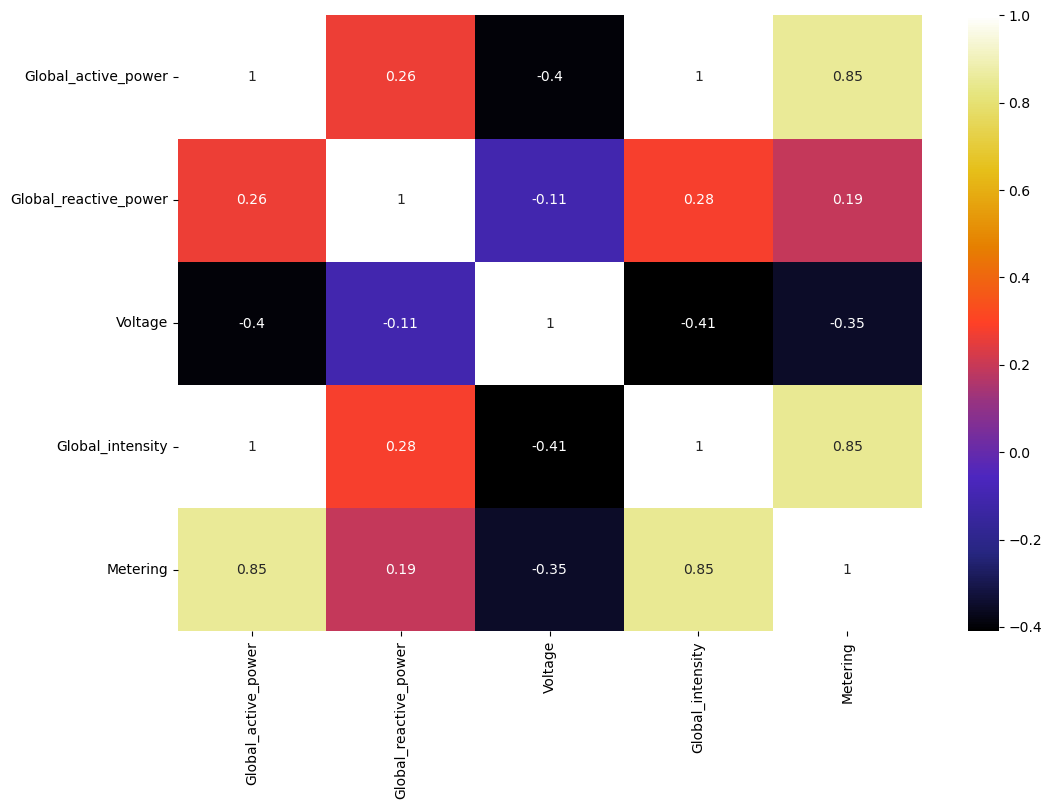

In [17]:
cor = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(cor, cmap="CMRmap", annot=True)
plt.show()

Global active power and global intensity are fully correlated. We will see if it affects the model perfomance or not.

## EDA



#### Comparative histograms

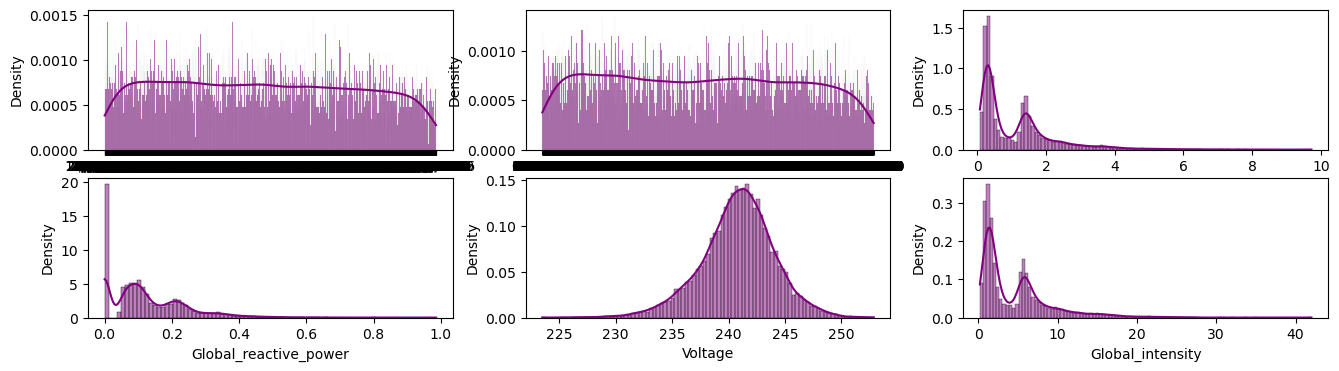

In [20]:
plt.figure(figsize=(16,4)) 
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.histplot(x = df.columns[i], kde=True,color = 'purple', stat = 'density', data = df)

As we visualize the data it seems that this needs some transformation for this to work properly. As the data has multimodal distribution. 

#### Comparative boxplots:

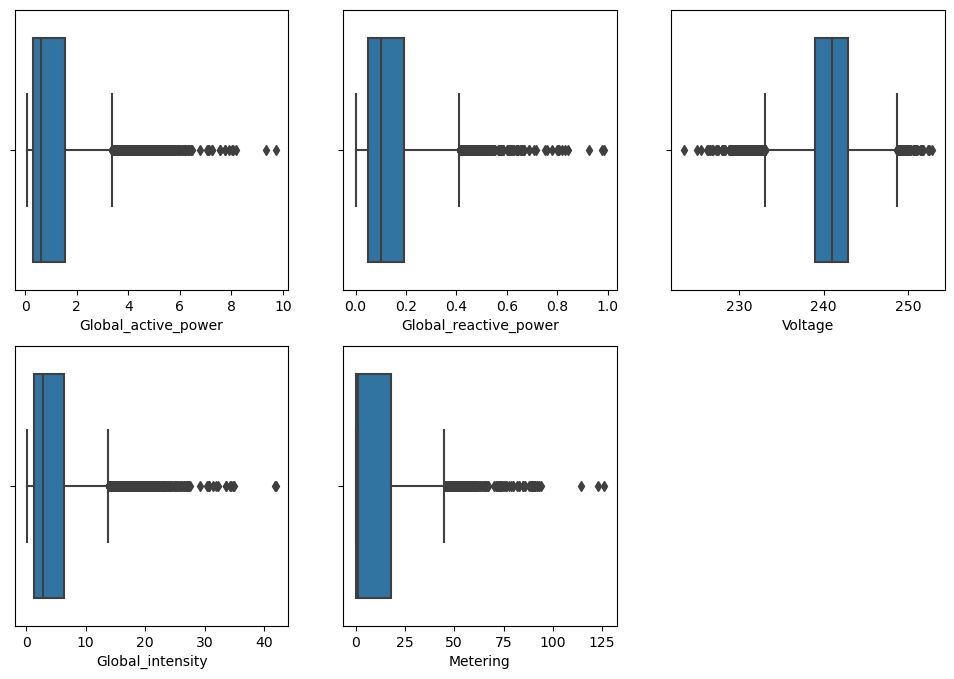

In [26]:
plt.figure(figsize=(12,8)) 
for i in range(5):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = df.columns[i+2] , data = df)

There are many outliers. Lets visualize the violinplot to get a measure of the data.

### Comparative voilinplots:

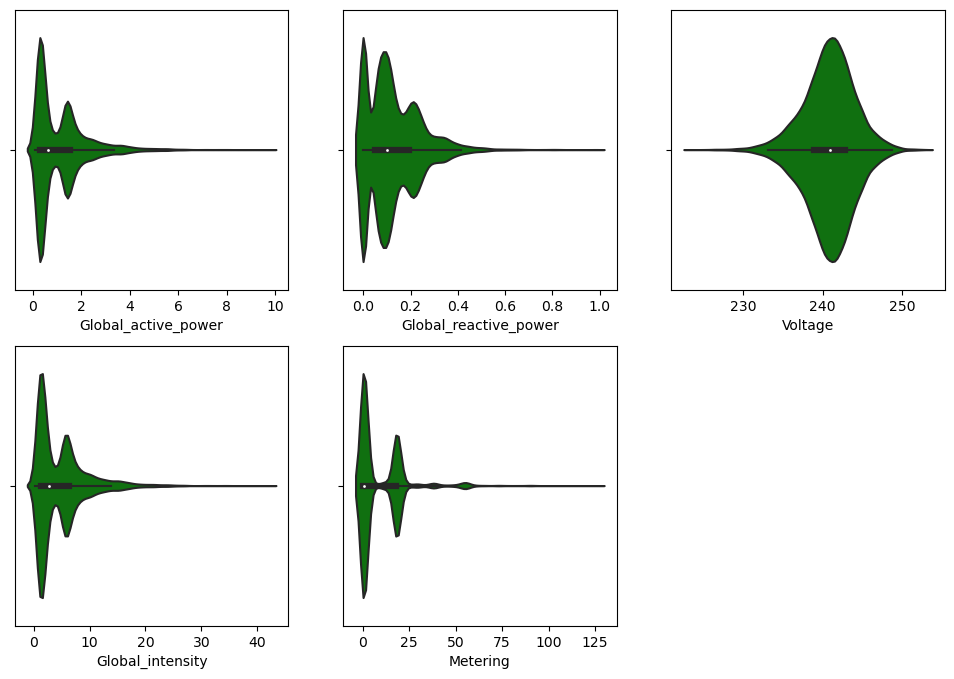

In [28]:
plt.figure(figsize=(12,8)) 
for i in range(5):
    plt.subplot(2,3,i+1)
    sns.violinplot(x = df.columns[i+2] , data = df, color = 'green')

## Handling Outliers:

Lets make a program to handle the outliers.

In [29]:
def outlierClip(x):
    q1 = np.percentile(x, 25, interpolation = 'midpoint')
    q3 = np.percentile(x, 75, interpolation = 'midpoint')
    iqr = q3 - q1
    upper = q3 + 2* iqr
    lower = q1 - 2* iqr
    # using clip function
    x = x.clip(lower=lower, upper=upper)
    return x

def applyFunc(df):
    df = df.apply(lambda x: outlierClip(x))
    return df

But first we have to drop the date time variable to apply this function.

In [31]:
df.drop(['Date', 'Time'], axis = 1, inplace = True)

In [32]:
df = applyFunc(df)

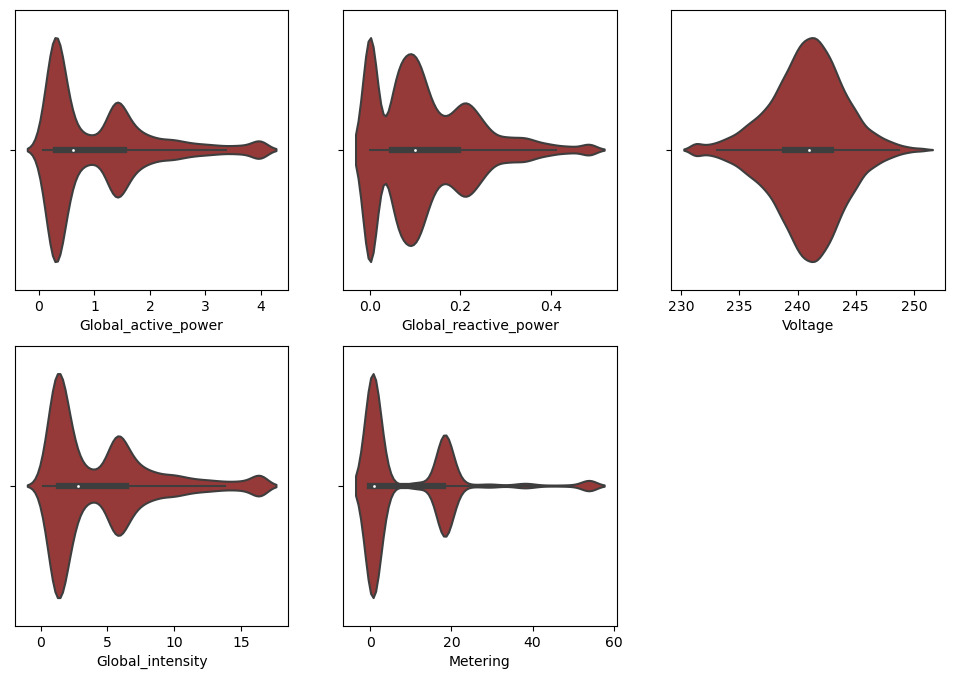

In [33]:
#  Checking the status with a violin plot

plt.figure(figsize=(12,8)) 
for i in range(5):
    plt.subplot(2,3,i+1)
    sns.violinplot(x = df.columns[i] , data = df, color = 'brown')

This data has become much better. Lets try the train test split and then the standard scaling.

## Preprocessing:




### Train Test Split

In [34]:
y = df['Metering']
X = df.drop('Metering', axis = 1)
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
1234544,0.346,0.084,241.38,1.4
2014090,1.324,0.080,240.03,5.4
1236957,1.468,0.116,241.39,6.0
602895,1.968,0.000,236.21,8.4
1464736,2.594,0.088,240.23,10.8


In [35]:
y.head()

1234544     2.0
2014090    18.0
1236957    21.0
602895     18.0
1464736     1.0
Name: Metering, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9921, 4), (4887, 4), (9921,), (4887,))

### Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    

In [39]:
# scaling the training variable
scaler.fit(X_train)

#transforming the training variable
X_train_tf=scaler.transform(X_train)

# transforming the test variable based on the train variable
X_test_tf=scaler.transform(X_test)

## Model Fitting:

### Linear Regression Model:

We will first try the Linear Regression model:

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create an object of the LinearRegression Model
model_lr = LinearRegression()

# fit the model with the training data
model_lr.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_lr = model_lr.predict(X_train_tf)
predict_test_lr  = model_lr.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of LR model on train data: ', mean_squared_error(y_train, predict_train_lr)**(0.5))
print('RMSE of LR model on test data: ',  mean_squared_error(y_test, predict_test_lr)**(0.5))

# parameters for calculating the accuracy meterics of the model
# no. of observations
n_train = len(y_train)
n_test = len(y_test)
# no. of predictors
p = 4

from sklearn.metrics import r2_score
# R2 & Adj_R2 on train data 
r2_train_lr = r2_score(y_train, predict_train_lr)
adj_r2_train_lr = 1-(1-r2_train_lr)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_lr = r2_score(y_test, predict_test_lr)
adj_r2_test_lr = 1-(1-r2_test_lr)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of LR model on train data: ', r2_train_lr)
print('Adjusted R squared of LR model on train data: ', adj_r2_train_lr)
print()
print('R squared of LR model on test data: ', r2_test_lr)
print('Adjusted R squared of LR model on test data: ', adj_r2_test_lr)

RMSE of LR model on train data:  6.580718202255977
RMSE of LR model on test data:  6.587304749354212
R squared of LR model on train data:  0.7145072637379442
Adjusted R squared of LR model on train data:  0.71439209926184

R squared of LR model on test data:  0.7083981964087893
Adjusted R squared of LR model on test data:  0.7081592764550071


##### The linear regressing model is giving a Rsquared score of around 70.8% on test data.

#### Lets try the other models.

### Ridge Regression Model:

In [43]:
from sklearn.linear_model import Ridge
model_rr = Ridge(alpha=1)

# fit the model with the training data
model_rr.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_rr = model_rr.predict(X_train_tf)
predict_test_rr  = model_rr.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Ridge model on train data: ', mean_squared_error(y_train, predict_train_rr)**(0.5))
print('RMSE of Ridge model on test data: ',  mean_squared_error(y_test, predict_test_rr)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_rr = r2_score(y_train, predict_train_rr)
adj_r2_train_rr = 1-(1-r2_train_rr)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_rr = r2_score(y_test, predict_test_rr)
adj_r2_test_rr = 1-(1-r2_test_rr)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Ridge model on train data: ', r2_train_rr)
print('Adjusted R squared of Ridge model on train data: ', adj_r2_train_rr)
print()
print('R squared of Ridge model on test data: ', r2_test_rr)
print('Adjusted R squared of Ridge model on test data: ', adj_r2_test_rr)

RMSE of Ridge model on train data:  6.5817426535845724
RMSE of Ridge model on test data:  6.580757044448675
R squared of Ridge model on train data:  0.7144183688272874
Adjusted R squared of Ridge model on train data:  0.7143031684920018

R squared of Ridge model on test data:  0.7089776059579617
Adjusted R squared of Ridge model on test data:  0.7087391607354774


#### The ridge regression with an alpha value of 1, is acting very similar to the linear regression model. 

Lets try some grid search cv with ridge regression model.

In [48]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}

# define the model/ estimator
model_rr = Ridge()

# define the grid search
model_rr_gscv = GridSearchCV(model_rr, param_grid = parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
model_rr_gscv.fit(X_train_tf,y_train)

# best estimator
print('The best model parameters are:',model_rr_gscv.best_estimator_)

# parameters for calculating the accuracy meterics of the model
# no. of observations
n_train = len(y_train)
n_test = len(y_test)
# no. of predictors
p = 4

# best model
model_rr_best = model_rr_gscv.best_estimator_
model_rr_best.fit(X_train_tf, y_train)


# predict the target on train and test data 
predict_train_rr_best = model_rr_best.predict(X_train_tf)
predict_test_rr_best  = model_rr_best.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Best Ridge model on train data: ', mean_squared_error(y_train, predict_train_rr_best)**(0.5))
print('RMSE of Best Ridge model on test data: ',  mean_squared_error(y_test, predict_test_rr_best)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_rr_best = r2_score(y_train, predict_train_rr_best)
adj_r2_train_rr_best = 1-(1-r2_train_rr_best)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_rr_best = r2_score(y_test, predict_test_rr)
adj_r2_test_rr_best = 1-(1-r2_test_rr_best)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Ridge model on train data: ', r2_train_rr_best)
print('Adjusted R squared of Ridge model on train data: ', adj_r2_train_rr_best)
print()
print('R squared of Ridge model on test data: ', r2_test_rr_best)
print('Adjusted R squared of Ridge model on test data: ', adj_r2_test_rr_best)

The best model parameters are: Ridge(alpha=0.1)
RMSE of Best Ridge model on train data:  6.580730482050611
RMSE of Best Ridge model on test data:  6.5864842189503445
R squared of Ridge model on train data:  0.7145061982629204
Adjusted R squared of Ridge model on train data:  0.714391033357016

R squared of Ridge model on test data:  0.7089776059579617
Adjusted R squared of Ridge model on test data:  0.7087391607354774


##### There is negligible improvement over the linear regression model in this.

### Lasso Regression:

In [51]:
from sklearn.linear_model import Lasso

model_ls = Lasso(alpha=0.1)

# fit the model with the training data
model_ls.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_ls = model_ls.predict(X_train_tf)
predict_test_ls  = model_ls.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Lasso model on train data: ', mean_squared_error(y_train, predict_train_ls)**(0.5))
print('RMSE of Lasso model on test data: ',  mean_squared_error(y_test, predict_test_ls)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_ls = r2_score(y_train, predict_train_ls)
adj_r2_train_ls = 1-(1-r2_train_ls)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_ls = r2_score(y_test, predict_test_ls)
adj_r2_test_ls = 1-(1-r2_test_ls)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Lasso model on train data: ', r2_train_ls)
print('Adjusted R squared of Lasso model on train data: ', adj_r2_train_ls)
print()
print('R squared of Lasso model on test data: ', r2_test_ls)
print('Adjusted R squared of Lasso model on test data: ', adj_r2_test_ls)

RMSE of Lasso model on train data:  6.6562573822947035
RMSE of Lasso model on test data:  6.603626323129357
R squared of Lasso model on train data:  0.7079153804515294
Adjusted R squared of Lasso model on train data:  0.7077975568857575

R squared of Lasso model on test data:  0.7069513841569955
Adjusted R squared of Lasso model on test data:  0.7067112787773617


#### This performed worse than the  grid search cv of Ridge regression. Now lets try grid search Cv on Lasso Regression.

In [54]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0.00001, 0] }

# define the model/ estimator
model_ls = Lasso()

# define the grid search
model_ls_gscv = GridSearchCV(model_ls, param_grid = parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
model_ls_gscv.fit(X_train_tf,y_train)

# best estimator
print('The best model parameters are:',model_ls_gscv.best_estimator_)

# parameters for calculating the accuracy meterics of the model
# no. of observations
n_train = len(y_train)
n_test = len(y_test)
# no. of predictors
p = 4

# best model
model_ls_best = model_ls_gscv.best_estimator_
model_ls_best.fit(X_train_tf, y_train)


# predict the target on train and test data 
predict_train_ls_best = model_ls_best.predict(X_train_tf)
predict_test_ls_best  = model_ls_best.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Best Lasso model on train data: ', mean_squared_error(y_train, predict_train_ls_best)**(0.5))
print('RMSE of Best Lasso model on test data: ',  mean_squared_error(y_test, predict_test_ls_best)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_ls_best = r2_score(y_train, predict_train_ls_best)
adj_r2_train_ls_best = 1-(1-r2_train_ls_best)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_ls_best = r2_score(y_test, predict_test_ls_best)
adj_r2_test_ls_best = 1-(1-r2_test_ls_best)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Best Lasso model on train data: ', r2_train_ls_best)
print('Adjusted R squared of Best Lasso model on train data: ', adj_r2_train_ls_best)
print()
print('R squared of Best lasso model on test data: ', r2_test_ls_best)
print('Adjusted R squared of Best Lasso model on test data: ', adj_r2_test_ls_best)

The best model parameters are: Lasso(alpha=0)
RMSE of Best Lasso model on train data:  6.582377409821379
RMSE of Best Lasso model on test data:  6.579333728225336
R squared of Best Lasso model on train data:  0.7143632820600613
Adjusted R squared of Best Lasso model on train data:  0.7142480595034094

R squared of Best lasso model on test data:  0.7069513841569955
Adjusted R squared of Best Lasso model on test data:  0.7067112787773617


##### Again we can see that Ridge has performed slightly better, than this Lasso model. Lets try elastic net now.

### Elastic Net Model

In [55]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)

# fit the model with the training data
model_en.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_en = model_en.predict(X_train_tf)
predict_test_en  = model_en.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of ELnet model on train data: ', mean_squared_error(y_train, predict_train_en)**(0.5))
print('RMSE of ELnet model on test data: ',  mean_squared_error(y_test, predict_test_en)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_en = r2_score(y_train, predict_train_en)
adj_r2_train_en = 1-(1-r2_train_en)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_en = r2_score(y_test, predict_test_en)
adj_r2_test_en = 1-(1-r2_test_en)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of ELnet model on train data: ', r2_train_en)
print('Adjusted R squared of ELnet model on train data: ', adj_r2_train_en)
print()
print('R squared of ELnet model on test data: ', r2_test_en)
print('Adjusted R squared of ELnet model on test data: ', adj_r2_test_en)

RMSE of ELnet model on train data:  7.130519821053528
RMSE of ELnet model on test data:  7.052499742598633
R squared of ELnet model on train data:  0.6648101508504123
Adjusted R squared of ELnet model on train data:  0.6646749391323205

R squared of ELnet model on test data:  0.6657581300785886
Adjusted R squared of ELnet model on test data:  0.6654842735690258


#### This is the worse model out of all the models considered so far.  Lets try grid search CV here.

In [59]:
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.model_selection import GridSearchCV

# defining the grid parameters

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

# define the model/ estimator
model_el = ElasticNet()

# define the grid search
model_el_gscv = GridSearchCV(model_el, param_grid = grid, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
model_el_gscv.fit(X_train_tf,y_train)

# best estimator
print('The best model parameters are:',model_el_gscv.best_estimator_)

# parameters for calculating the accuracy meterics of the model
# no. of observations
n_train = len(y_train)
n_test = len(y_test)
# no. of predictors
p = 4

# best model
model_el_best = model_el_gscv.best_estimator_
model_el_best.fit(X_train_tf, y_train)


# predict the target on train and test data 
predict_train_el_best = model_el_best.predict(X_train_tf)
predict_test_el_best  = model_el_best.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Best Elnet model on train data: ', mean_squared_error(y_train, predict_train_el_best)**(0.5))
print('RMSE of Best Elnet model on test data: ',  mean_squared_error(y_test, predict_test_el_best)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_el_best = r2_score(y_train, predict_train_el_best)
adj_r2_train_el_best = 1-(1-r2_train_el_best)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_el_best = r2_score(y_test, predict_test_el_best)
adj_r2_test_el_best = 1-(1-r2_test_el_best)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Best Elnet model on train data: ', r2_train_el_best)
print('Adjusted R squared of Best Elnet model on train data: ', adj_r2_train_el_best)
print()
print('R squared of Best Elnet model on test data: ', r2_test_el_best)
print('Adjusted R squared of Best Elnet model on test data: ', adj_r2_test_el_best)

The best model parameters are: ElasticNet(alpha=0.0, l1_ratio=0.0)
RMSE of Best Elnet model on train data:  6.582377409821379
RMSE of Best Elnet model on test data:  6.579333728225336
R squared of Best Elnet model on train data:  0.7143632820600613
Adjusted R squared of Best Elnet model on train data:  0.7142480595034094

R squared of Best Elnet model on test data:  0.709103479652321
Adjusted R squared of Best Elnet model on test data:  0.7088651375627284


#### The alpha l1_ratio values of the best model indicate that the linear regression is the best model. 

#### Lets try the support vector regression model now.

### Support Vector Regressor:

In [60]:
from sklearn.svm import SVR

model_sv = SVR(kernel = 'poly')

# fit the model with the training data
model_sv.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_sv = model_sv.predict(X_train_tf)
predict_test_sv  = model_sv.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of SV model on train data: ', mean_squared_error(y_train, predict_train_sv)**(0.5))
print('RMSE of SV model on test data: ',  mean_squared_error(y_test, predict_test_sv)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_sv = r2_score(y_train, predict_train_sv)
adj_r2_train_sv = 1-(1-r2_train_sv)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_sv = r2_score(y_test, predict_test_sv)
adj_r2_test_sv = 1-(1-r2_test_sv)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of SV model on train data: ', r2_train_sv)
print('Adjusted R squared of Sv model on train data: ', adj_r2_train_sv)
print()
print('R squared of SV model on test data: ', r2_test_sv)
print('Adjusted R squared of SV model on test data: ', adj_r2_test_sv)

RMSE of SV model on train data:  9.28110208269011
RMSE of SV model on test data:  9.224988863532966
R squared of SV model on train data:  0.43213176759669114
Adjusted R squared of Sv model on train data:  0.4319026961031843

R squared of SV model on test data:  0.42811804197789827
Adjusted R squared of SV model on test data:  0.4276494783088921


In [62]:
# trying with rbf kernel 
from sklearn.svm import SVR

model_sv = SVR(kernel = 'rbf')

# fit the model with the training data
model_sv.fit(X_train_tf, y_train)

# predict the target on train and test data 
predict_train_sv = model_sv.predict(X_train_tf)
predict_test_sv  = model_sv.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of SV model on train data: ', mean_squared_error(y_train, predict_train_sv)**(0.5))
print('RMSE of SV model on test data: ',  mean_squared_error(y_test, predict_test_sv)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_sv = r2_score(y_train, predict_train_sv)
adj_r2_train_sv = 1-(1-r2_train_sv)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_sv = r2_score(y_test, predict_test_sv)
adj_r2_test_sv = 1-(1-r2_test_sv)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of SV model on train data: ', r2_train_sv)
print('Adjusted R squared of Sv model on train data: ', adj_r2_train_sv)
print()
print('R squared of SV model on test data: ', r2_test_sv)
print('Adjusted R squared of SV model on test data: ', adj_r2_test_sv)

RMSE of SV model on train data:  6.331950766822386
RMSE of SV model on test data:  6.364383677835735
R squared of SV model on train data:  0.735683950936072
Adjusted R squared of Sv model on train data:  0.73557732889127

R squared of SV model on test data:  0.7278004512475977
Adjusted R squared of SV model on test data:  0.7275774282662357


#### This is the best score so far and we can try grid search cv now to refine it further.

In [64]:
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV

# defining the grid parameters

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 

# define the model/ estimator
model_sv = SVR()

# define the grid search
model_sv_gscv = GridSearchCV(model_sv, param_grid = param_grid, scoring='neg_mean_squared_error',cv=5, n_jobs = -1)

#fit the grid search
model_sv_gscv.fit(X_train_tf,y_train)

# best estimator
print('The best model parameters are:',model_sv_gscv.best_estimator_)

# parameters for calculating the accuracy meterics of the model
# no. of observations
n_train = len(y_train)
n_test = len(y_test)
# no. of predictors
p = 4

# best model
model_sv_best = model_sv_gscv.best_estimator_
model_sv_best.fit(X_train_tf, y_train)


# predict the target on train and test data 
predict_train_sv_best = model_sv_best.predict(X_train_tf)
predict_test_sv_best  = model_sv_best.predict(X_test_tf)

# Root Mean Squared Error on train and test date
print('RMSE of Best SV model on train data: ', mean_squared_error(y_train, predict_train_sv_best)**(0.5))
print('RMSE of Best SV model on test data: ',  mean_squared_error(y_test, predict_test_sv_best)**(0.5))

# R2 & Adj_R2 on train data 
from sklearn.metrics import r2_score
r2_train_sv_best = r2_score(y_train, predict_train_sv_best)
adj_r2_train_sv_best = 1-(1-r2_train_sv_best)*(n_train-1)/(n_train-p-1)

# R2 & Adj_R2 on test data
r2_test_sv_best = r2_score(y_test, predict_test_sv_best)
adj_r2_test_sv_best = 1-(1-r2_test_sv_best)*(n_test-1)/(n_test-p-1)

# R2 & Adj_R2 on train and test date
print('R squared of Best SV model on train data: ', r2_train_sv_best)
print('Adjusted R squared of Best SV model on train data: ', adj_r2_train_sv_best)
print()
print('R squared of Best SV model on test data: ', r2_test_sv_best)
print('Adjusted R squared of Best SV model on test data: ', adj_r2_test_sv_best)

The best model parameters are: SVR(C=10, gamma=1)
RMSE of Best SV model on train data:  6.159096364634971
RMSE of Best SV model on test data:  6.229066734368782
R squared of Best SV model on train data:  0.7499179773250013
Adjusted R squared of Best SV model on train data:  0.749817097122228

R squared of Best SV model on test data:  0.7392521947004407
Adjusted R squared of Best SV model on test data:  0.739038554548618


#### This is by far the best results so far. SVR with gridsearch CV improves the Adjusted R -squared over the linear regression model of 70.8% to 73.9%.    
##### But this consumes massive amount of resource for a minor improvement. My machine has to run for 3 hours to crunch the SVR model whereas it was few minutes in case of linear regression model.